In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
# Load data
df = pd.read_csv('/Users/christopheryang/Desktop/clean data for analysis/cleanbackup.csv')

# Define features and target
X = df.drop(['IgA ASCA EU','IgG ASCA EU','OmpC. EU','Cbir1 EU','ANCA EU','serum_id', 'participant_id', 'sample_name'], axis=1)  # drop target columns
y = df['ANCA EU']  # or another inflammation marker

In [207]:
# print(df.columns.tolist())

In [208]:
X.head()

,Phocaeicola_vulgatus,Faecalibacterium_prausnitzii,Bacteroides_uniformis,Prevotella_copri_clade_A,Bacteroides_stercoris,Phocaeicola_dorei,Bacteroides_ovatus,Bacteroides_fragilis,Eubacterium_rectale,Alistipes_putredinis,...,Gemmiger_formicilis,GGB58485_SGB80143,age,sex_Female,sex_Male,race_American Indian or Alaska Native,race_Black or African American,race_More than one race,race_Other,race_White
0,0.466296,0.046730,0.000657,0.000000,0.000000,0.012400,0.000075,0.000000,0.057284,0.000549,...,0.000000,0.000000,30,0,1,0,0,0,0,1
1,0.201702,0.203203,0.101080,0.000000,0.093508,0.000024,0.000318,0.004624,0.011832,0.066698,...,0.000106,0.000047,40,1,0,0,0,0,0,1
2,0.277953,0.123363,0.184297,0.002813,0.000000,0.078403,0.030045,0.000000,0.011108,0.000041,...,0.000000,0.000000,7,1,0,0,1,0,0,0
3,0.216124,0.107264,0.080507,0.000051,0.000360,0.080686,0.017426,0.000000,0.030178,0.110285,...,0.000000,0.000000,7,1,0,0,1,0,0,0
4,0.270831,0.081354,0.109214,0.000000,0.000000,0.062907,0.029034,0.000000,0.014831,0.104656,...,0.000000,0.000000,7,1,0,0,1,0,0,0


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [211]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [212]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import numpy as np

print('R2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('Explained Variance:', explained_variance_score(y_test, y_pred))

R2: 0.7748560503022317
RMSE: 19.794108282240845
MAE: 3.168067226890756
Explained Variance: 0.7750843035686475


Cross validation

In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation using R2 as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R2 scores:", cv_scores)
print("Mean R2:", np.mean(cv_scores))
print("Std R2:", np.std(cv_scores))

Cross-validated R2 scores: [ 0.10846078  0.08898307 -2.32577278  0.12784808  0.03204883]
Mean R2: -0.3936864025748473
Std R2: 0.9665741652366764


In [214]:
import pickle

# Save the model to a file
with open('Anca.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [215]:
# import matplotlib.pyplot as plt

# metrics = {
#     'R2': r2_score(y_test, y_pred),
#     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
#     'MAE': mean_absolute_error(y_test, y_pred),
#     'Explained Variance': explained_variance_score(y_test, y_pred)
# }

# plt.figure(figsize=(8,4))
# plt.bar(metrics.keys(), metrics.values(), color=['#7C0A02', '#FF3333', '#222222', '#888888'])
# plt.title('Regression Metrics of IgG ASCA EU')
# plt.ylabel('Score / Error')
# plt.tight_layout()
# plt.savefig('regression_metrics.png')
# plt.show()

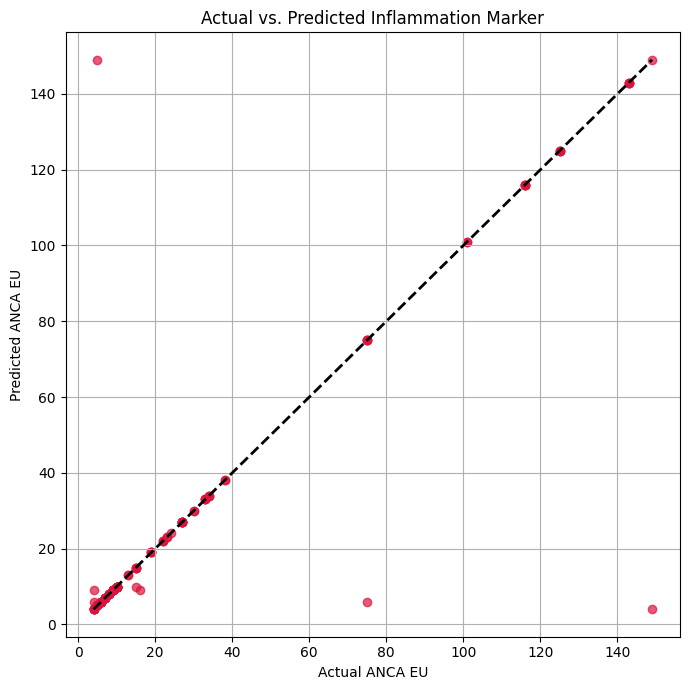

In [216]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.7, color='crimson')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual ANCA EU')
plt.ylabel('Predicted ANCA EU')
plt.title('Actual vs. Predicted Inflammation Marker')
plt.grid(True)
plt.tight_layout()
# plt.savefig('actual_vs_predicted.png')  # Save the plot as a file
plt.show()